<h1>Data Analysis And Visualization: Group Assignment</h1>
<h1>Financial Barriers in the Digital Age: Why Many Still Lack Mobile Money Accounts in South Africa and Other African Countries<h1>

<hr><hr>

<h2>Group Members</h2>

<h3>Names and Last Names -- Student Number</h3>
<h3>Nkosinathi Bradley Zitha -- 202342654</h3>
<h3>Maxwell Senzo Ngcane -- 202308852</h3>
<h3>Siphokuhle Njova -- 202112932</h3>




<hr>

<h4>1. Data Preparation.</h4>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [3]:
# Loading the dataset

data_a= pd.read_csv("WB_FINDEX_FIN14A.csv")
data_d = pd.read_csv("WB_FINDEX_FIN14D.csv")

In [4]:
# Selecting the countries and columns we will use in this analysis

countries = ['Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Senegal', 'Sierra Leone', 'South Africa', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe', 'Sub-Saharan Africa (excluding high income)']

df_filtered_a = data_a[data_a["REF_AREA_LABEL"].isin(countries)]

df_selected_a = df_filtered_a[["REF_AREA_LABEL", "OBS_VALUE", "UNIT_MEASURE"]]

# Printing to see the data
print("Head of selected data for FIN14A:")
print(df_selected_a.head())

Head of selected data for FIN14A:
   REF_AREA_LABEL  OBS_VALUE UNIT_MEASURE
19        Liberia  19.437954      PT_RESP
20     Madagascar  32.553897      PT_RESP
21         Malawi   6.586628      PT_RESP
22           Mali  10.084564      PT_RESP
23     Mozambique  16.205515      PT_RESP


In [5]:

df_filtered_d = data_d[data_d["REF_AREA_LABEL"].isin(countries)]
df_selected_d = df_filtered_d[["REF_AREA_LABEL", "OBS_VALUE", "UNIT_MEASURE"]]

print("\nHead of selected data for FIN14D:")
print(df_selected_d.head())


Head of selected data for FIN14D:
   REF_AREA_LABEL  OBS_VALUE UNIT_MEASURE
19        Liberia  33.121814      PT_RESP
20     Madagascar  42.521245      PT_RESP
21         Malawi  35.828747      PT_RESP
22           Mali  23.258958      PT_RESP
23     Mozambique  27.491945      PT_RESP


In [6]:
# We then filter PT_RESP_NACCT only which is Percentage of respondents without an account in full

df_nacct_a = df_selected_a[df_selected_a["UNIT_MEASURE"] == "PT_RESP_NACCT"].copy()
df_nacct_a.rename(columns={"REF_AREA_LABEL": "Country", "OBS_VALUE": "Agents Too Far (%)"}, inplace=True)
df_nacct_a = df_nacct_a[["Country", "Agents Too Far (%)"]]

df_nacct_d = df_selected_d[df_selected_d["UNIT_MEASURE"] == "PT_RESP_NACCT"].copy()
df_nacct_d.rename(columns={"REF_AREA_LABEL": "Country", "OBS_VALUE": "Not Enough Money (%)"}, inplace=True)
df_nacct_d = df_nacct_d[["Country", "Not Enough Money (%)"]]

In [7]:
# We then handle Missing values in columns with mean

df_nacct_a['Agents Too Far (%)'].fillna(df_nacct_a['Agents Too Far (%)'].mean(), inplace=True)
df_nacct_d['Not Enough Money (%)'].fillna(df_nacct_d['Not Enough Money (%)'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8484\3658827955.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nacct_a['Agents Too Far (%)'].fillna(df_nacct_a['Agents Too Far (%)'].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8484\3658827955.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [8]:
# Here we generate descriptive stats for the first dataframe

print("\nDescriptive Stats for Dataset 1 (Agents Too Far):")
print(df_nacct_a.describe())


Descriptive Stats for Dataset 1 (Agents Too Far):
       Agents Too Far (%)
count           18.000000
mean            27.767679
std              7.290835
min             11.471781
25%             23.430145
50%             27.767679
75%             31.095413
max             40.534469


In [9]:
# Here we generate descriptive stats for the second dataframe

print("\nDescriptive Stats for Dataset 2 (Not Enough Money):")
print(df_nacct_d.describe())


Descriptive Stats for Dataset 2 (Not Enough Money):
       Not Enough Money (%)
count             18.000000
mean              54.078688
std               11.320088
min               24.267498
25%               49.480106
50%               53.857691
75%               58.915583
max               72.063577


<hr><hr>

<h4>2. Numerical Analysis</h4>

In [10]:
# Here we are using NumPy for calculations

agents_array = df_nacct_a['Agents Too Far (%)'].to_numpy()
money_array = df_nacct_d['Not Enough Money (%)'].to_numpy()

In [11]:
# Here we reshape the arrays


agents_reshaped = agents_array.reshape(-1, 1)
money_reshaped = money_array.reshape(-1, 1)

In [12]:
# We then perform the operations

mean_agents = np.mean(agents_array)
std_agents = np.std(agents_array)
mean_money = np.mean(money_array)
std_money = np.std(money_array)

print(f"Mean for Agents Too Far: {mean_agents}")
print(f"Standard Deviation for Agents Too Far: {std_agents}")
print(f"Mean for Not Enough Money: {mean_money}")
print(f"Standard Deviation for Not Enough Money: {std_money}")

# Findings: The mean percentage for not enough money is higher than for agents too far, Which indicates that it's a more common barrier.

Mean for Agents Too Far: 27.76767902374271
Standard Deviation for Agents Too Far: 7.085418462594914
Mean for Not Enough Money: 54.078688453870626
Standard Deviation for Not Enough Money: 11.001148564354038


<hr><hr>

<h4>3. Visualisation</h4>

In [13]:
# Here we merge the datasets for visualization

df_merged = pd.merge(df_nacct_a, df_nacct_d, on='Country')

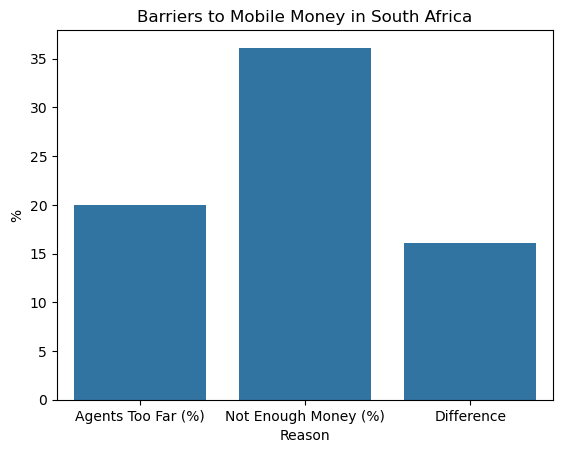

In [30]:
# We then plot a bar graph for South Africa

sa_data = df_merged[df_merged['Country'] == 'South Africa']
sa_data_melted = sa_data.melt(id_vars='Country', var_name='Reason', value_name='%')
sns.barplot(x='Reason', y='%', data=sa_data_melted)
plt.title('Barriers to Mobile Money in South Africa')
plt.savefig("Barriers_to_Mobile_Money_in_South_Africa.png")
plt.show()

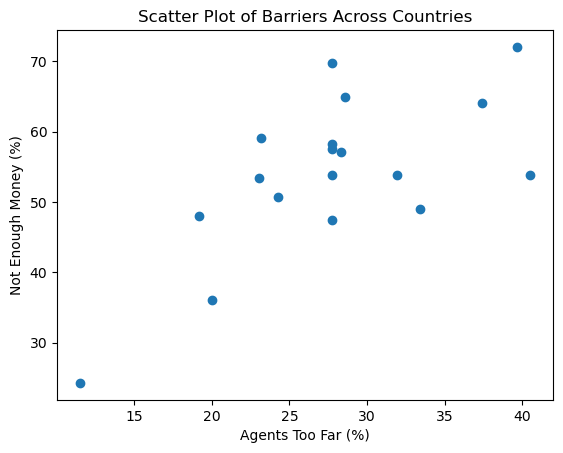

In [31]:
# We plot a Scatter plot for all the countries

plt.scatter(df_merged['Agents Too Far (%)'], df_merged['Not Enough Money (%)'])
plt.xlabel('Agents Too Far (%)')
plt.ylabel('Not Enough Money (%)')
plt.title('Scatter Plot of Barriers Across Countries')
plt.savefig("Scatter_Plot_of_Barriers_Across_Countries.png")
plt.show()

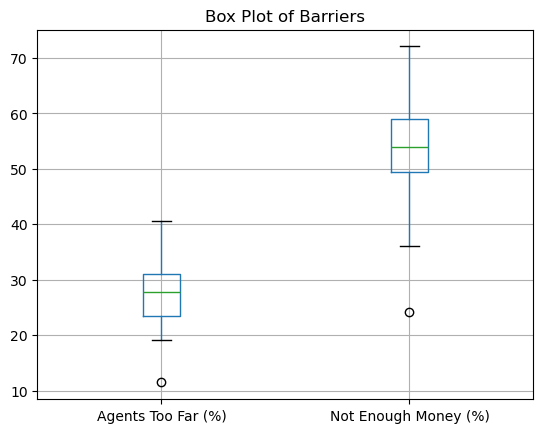

In [16]:
# A Box plot

df_merged[['Agents Too Far (%)', 'Not Enough Money (%)']].boxplot()
plt.title('Box Plot of Barriers')
plt.show()

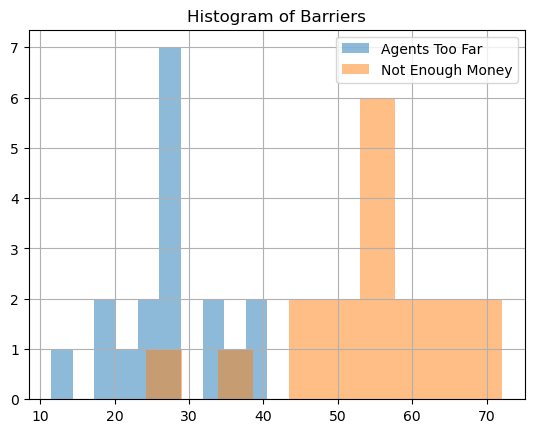

In [17]:
# We plot a Histogram

df_merged['Agents Too Far (%)'].hist(alpha=0.5, label='Agents Too Far')
df_merged['Not Enough Money (%)'].hist(alpha=0.5, label='Not Enough Money')
plt.legend()
plt.title('Histogram of Barriers')
plt.savefig("Histogram_of_Barriers.png")
plt.show()

<hr><hr>

<h3>4. Database Integration</h4>

In [33]:
# Here we build and create a database

conn = sqlite3.connect('findex.db')
c = conn.cursor()

In [19]:
# We create a table

c.execute('''CREATE TABLE IF NOT EXISTS barriers
             (Country TEXT, Agents_Too_Far REAL, Not_Enough_Money REAL)''')

In [20]:
# We then insert the data

for index, row in df_merged.iterrows():
    c.execute("INSERT INTO barriers VALUES (?, ?, ?)", (row['Country'], row['Agents Too Far (%)'], row['Not Enough Money (%)']))

conn.commit()

In [21]:
# We query the database

query = "SELECT * FROM barriers WHERE Country = 'South Africa'"
df_db = pd.read_sql_query(query, conn)
print(df_db)

        Country  Agents_Too_Far  Not_Enough_Money
0  South Africa       19.997353         36.118049


In [22]:
# We update the records

c.execute("UPDATE barriers SET Agents_Too_Far = 20.0 WHERE Country = 'South Africa'")
conn.commit()

In [23]:
# We delete a record

c.execute("DELETE FROM barriers WHERE Country = 'Pakistan'")
conn.commit()

In [34]:
# We load back into Pandas

df_from_db = pd.read_sql_query("SELECT * FROM barriers", conn)
print(df_from_db)

conn.close()

                                       Country  Agents_Too_Far  \
0                                      Liberia       37.420391   
1                                   Madagascar       40.534469   
2                                       Malawi       27.767679   
3                                         Mali       19.180724   
4                                   Mozambique       31.942514   
5                                      Namibia       24.232783   
6                                        Niger       39.667232   
7                                      Nigeria       28.348191   
8                                      Senegal       27.767679   
9                                 Sierra Leone       28.554109   
10                                South Africa       20.000000   
11                                    Tanzania       27.767679   
12                                        Togo       33.415541   
13                                      Uganda       27.767679   
14        

<hr><hr>

<h4>5. Python/Excel Data Analysis</h4>

In [25]:
# Clean and transform
df_merged['Difference'] = df_merged['Not Enough Money (%)'] - df_merged['Agents Too Far (%)']

# Conditional formatting (in Pandas style)
styled = df_merged.style.background_gradient(cmap='viridis', subset=['Difference'])
display(styled)

,Country,Agents Too Far (%),Not Enough Money (%),Difference
0,Liberia,37.420391,64.051561,26.631170
1,Madagascar,40.534469,53.844760,13.310291
2,Malawi,27.767679,69.720303,41.952624
3,Mali,19.180724,48.000431,28.819708
4,Mozambique,31.942514,53.825770,21.883256
5,Namibia,24.232783,50.757686,26.524903
6,Niger,39.667232,72.063577,32.396345
7,Nigeria,28.348191,57.177090,28.828898
8,Pakistan,23.162599,59.142100,35.979501
9,Senegal,27.767679,53.870622,26.102943


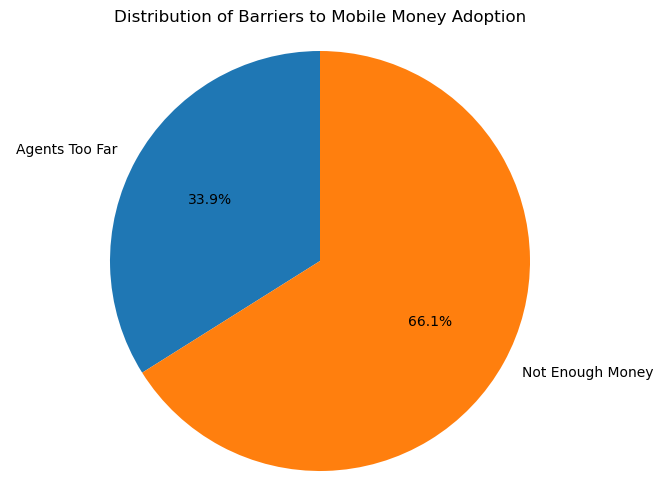

In [26]:
# A Pie Chart showing the distribution of Barriers to Mobile Money Adoption

plt.figure(figsize=(8, 6))
labels = ['Agents Too Far', 'Not Enough Money']
sizes = [df_merged['Agents Too Far (%)'].sum(), df_merged['Not Enough Money (%)'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Barriers to Mobile Money Adoption')
plt.axis('equal')

plt.savefig("Distribution_of_Barriers_to_Mobile_Money_Adoption.png")

plt.show()

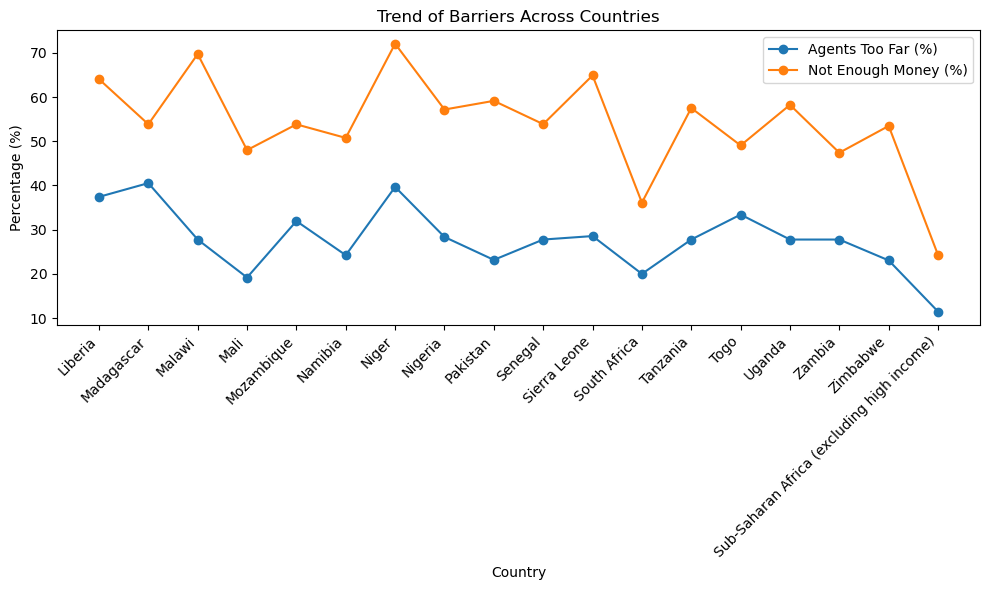

In [27]:
# A Line Graph showing a Trend of Barriers Across Countries

plt.figure(figsize=(10, 6))
plt.plot(df_merged['Country'], df_merged['Agents Too Far (%)'], label='Agents Too Far (%)', marker='o')
plt.plot(df_merged['Country'], df_merged['Not Enough Money (%)'], label='Not Enough Money (%)', marker='o')
plt.xlabel('Country')
plt.ylabel('Percentage (%)')
plt.title('Trend of Barriers Across Countries')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig("Trend of Barriers Across Countries.png")
plt.show()

In [28]:
# Summarize findings

print("Summary: In South Africa, not having enough money is a larger barrier (36%) than agent distance (20%). This trend holds across SSA.")

Summary: In South Africa, not having enough money is a larger barrier (36%) than agent distance (20%). This trend holds across SSA.
